In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

In [176]:
warnings.simplefilter(action='ignore')

In [177]:
df = pd.read_csv('https://raw.githubusercontent.com/Nisarg221B/Electric_Vehicle_Market_Segmentation/master/prepared_dataset/101_110.csv', sep=',', index_col=0)

In [178]:
df.head()

,Rating,Model Name,Type,Category of e-Vehicle
0,1.0,TVS iQube,2-wheeler,e-2W
1,3.0,TVS iQube,2-wheeler,e-2W
2,2.0,TVS iQube,2-wheeler,e-2W
3,5.0,TVS iQube,2-wheeler,e-2W
4,4.0,TVS iQube,2-wheeler,e-2W


In [179]:
df.shape

(179, 4)

In [180]:
df['Type'].unique()

array(['2-wheeler', '4-wheeler'], dtype=object)

In [181]:
df['Type'].value_counts()

2-wheeler    144
4-wheeler     35
Name: Type, dtype: int64

In [182]:
df['Rating'].unique()

array([1. , 3. , 2. , 5. , 4. , 4.5, 3.5, 2.5, 1.5, 0. ])

In [183]:
df['Model Name'].unique()

array(['TVS iQube', 'Revolt RV 400', 'Bajaj Chetak', 'OLA S1 Pro',
       'Ather 450X', 'Hero Electric Optima', 'Tork Kratos', 'OLA S1',
       'Bounce Infinity E1', 'Hero Electric Optima CX',
       'Hero Electric Flash', 'Ampere Magnus EX', 'Revolt RV 300',
       'Hero Electric Photon', 'Okinawa Praise', 'Benling Aura',
       'Ampere Magnus Pro', 'PURE EV EPluto 7G', 'Ampere REO',
       'Odysse Evoqis', 'Hero Electric NYX HX', 'Okinawa i-Praise',
       'Joy e-bike Monster', 'PURE EV ETrance Neo', 'Evolet Polo',
       'Okinawa Ridge Plus', 'Ampere Zeal', 'Hero Electric Atria',
       'Okinawa Lite', 'Hero Electric NYX', 'Okinawa R30', 'Yo Drift',
       'BGauss B8', 'Joy e-bike Wolf', 'Gemopai Astrid Lite',
       'Techo Electra Emerge', 'Techo Electra Raptor', 'e-bike Gen Nxt',
       'Gemopai Ryder', 'hyundai kona', 'Kia EV6', 'Tata Nexon EV',
       'MG ZS EV', 'Tata Tigor EV', 'BYD E6', 'tata nexon ev',
       'tata tigor ev'], dtype=object)

In [184]:
df['Model Name'].value_counts()

Tata Nexon EV              8
hyundai kona               7
TVS iQube                  5
Revolt RV 400              5
Ampere Zeal                5
Okinawa Lite               5
Ampere REO                 5
PURE EV EPluto 7G          5
Okinawa Praise             5
Hero Electric Photon       5
Okinawa Ridge Plus         5
Hero Electric Flash        5
Hero Electric Optima CX    5
Hero Electric Optima       5
OLA S1 Pro                 5
tata nexon ev              5
Yo Drift                   4
Techo Electra Raptor       4
Okinawa R30                4
Hero Electric NYX          4
MG ZS EV                   4
BGauss B8                  4
PURE EV ETrance Neo        4
tata tigor ev              4
Okinawa i-Praise           4
Ather 450X                 4
Ampere Magnus Pro          4
Benling Aura               4
Tork Kratos                4
Ampere Magnus EX           4
OLA S1                     4
e-bike Gen Nxt             3
Bajaj Chetak               3
Tata Tigor EV              3
Kia EV6       

In [185]:
df['Category of e-Vehicle'].unique()

array(['e-2W', nan, 'e-4W'], dtype=object)

In [186]:
df['Category of e-Vehicle'].value_counts()

e-2W    100
e-4W     20
Name: Category of e-Vehicle, dtype: int64

In [187]:
df.isnull().sum()

Rating                    0
Model Name                0
Type                      0
Category of e-Vehicle    59
dtype: int64

# Analysis

In [188]:
df.head()

,Rating,Model Name,Type,Category of e-Vehicle
0,1.0,TVS iQube,2-wheeler,e-2W
1,3.0,TVS iQube,2-wheeler,e-2W
2,2.0,TVS iQube,2-wheeler,e-2W
3,5.0,TVS iQube,2-wheeler,e-2W
4,4.0,TVS iQube,2-wheeler,e-2W


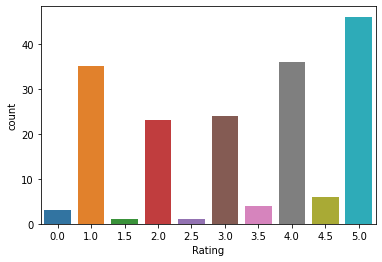

In [189]:
sns.countplot(data=df, x='Rating', order=[0.0, 1.0, 1.5, 2.0 , 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]);

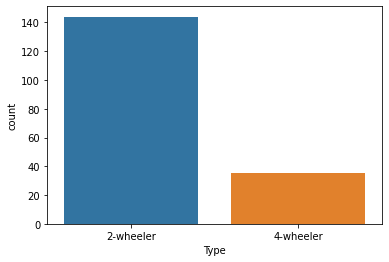

In [190]:
sns.countplot(data=df, x='Type');

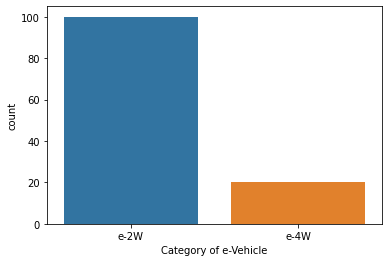

In [191]:
sns.countplot(data=df, x='Category of e-Vehicle');

# Preprocessing

In [192]:
df['Category of e-Vehicle'] = np.where((df['Category of e-Vehicle'].isnull()) & (df['Type'] == '2-wheeler'),'e-2W', df['Category of e-Vehicle'])
df['Category of e-Vehicle'] = np.where((df['Category of e-Vehicle'].isnull()) & (df['Type'] == '4-wheeler'),'e-4W', df['Category of e-Vehicle'])

In [193]:
df['Category of e-Vehicle'].isnull().sum()

0

In [194]:
df['Category of e-Vehicle'].value_counts()

e-2W    144
e-4W     35
Name: Category of e-Vehicle, dtype: int64

In [195]:
df['Type'].value_counts()

2-wheeler    144
4-wheeler     35
Name: Type, dtype: int64

In [202]:
df_modified = pd.get_dummies(df, drop_first=True)

In [203]:
df_modified.head()

,Rating,Model Name_Ampere Magnus Pro,Model Name_Ampere REO,Model Name_Ampere Zeal,Model Name_Ather 450X,Model Name_BGauss B8,Model Name_BYD E6,Model Name_Bajaj Chetak,Model Name_Benling Aura,Model Name_Bounce Infinity E1,...,Model Name_Techo Electra Emerge,Model Name_Techo Electra Raptor,Model Name_Tork Kratos,Model Name_Yo Drift,Model Name_e-bike Gen Nxt,Model Name_hyundai kona,Model Name_tata nexon ev,Model Name_tata tigor ev,Type_4-wheeler,Category of e-Vehicle_e-4W
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
from sklearn.decomposition import PCA

In [220]:
pca = PCA(n_components=2)

In [226]:
def do_pca(data : pd.DataFrame) -> np.ndarray:
    principalComponents = pca.fit_transform(data)
    df1 = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
    df1.set_index(data.index)
    return df1

In [227]:
df1 = do_pca(df_modified)

In [228]:
df1.head()

,principal component 1,principal component 2
0,2.200562,-0.259053
1,0.201410,-0.290361
2,1.200986,-0.274707
3,-1.797741,-0.321669
4,-0.798166,-0.306015


In [229]:
from sklearn import neighbors
from sklearn.cluster import KMeans

In [232]:
wcss = []
for i in range(1,11):
  model = KMeans(n_clusters = i, init = "k-means++")
  model.fit(df1)
  wcss.append(model.inertia_)

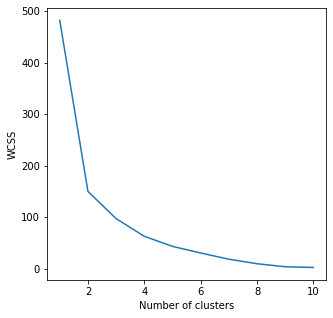

In [243]:
plt.figure(figsize=(5,5))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [266]:
model1 = KMeans(n_clusters = 3, init = "k-means++", max_iter=300, n_init=10,random_state=0)
Y = model1.fit_predict(df1)
print(Y)

[2 1 2 0 1 2 0 1 1 2 0 1 2 0 2 1 1 2 2 0 1 2 2 1 0 1 2 1 0 1 2 0 2 1 2 0 1
 2 2 0 1 1 2 0 1 2 1 2 0 1 2 1 0 2 1 0 1 2 2 2 1 0 2 1 2 0 1 2 1 2 0 1 2 2
 1 0 1 2 0 1 2 1 0 0 1 1 2 0 0 2 1 2 1 0 0 0 2 1 2 1 1 0 2 2 1 1 0 0 1 1 2
 2 1 2 1 0 1 0 2 2 0 2 1 1 1 2 2 0 2 0 0 0 2 1 0 2 1 1 2 1 0 2 0 1 0 2 1 0
 0 0 1 0 1 1 1 0 2 2 2 0 0 1 1 0 0 1 0 2 1 2 1 0 2 1 2 0 2 2 1]


In [269]:
plt.figure(figsize=(10,10))
plt.scatter(df1[Y == 0 , 0] , df1[Y == 0 , 1] , label = 'cluster_1')
plt.scatter(df1[Y == 1 , 0] , df1[Y == 1 , 1] , label = 'cluster_2')
plt.scatter(df1[Y == 2 , 0] , df1[Y == 2 , 1] , label = 'cluster_3')
plt.legend()
plt.show()

InvalidIndexError: (array([False, False, False,  True, False, False,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False,  True, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False,  True, False, False,  True, False, False,
       False,  True,  True, False, False, False,  True,  True, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
        True, False, False,  True, False, False, False, False, False,
       False,  True, False,  True,  True,  True, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
        True, False, False,  True,  True,  True, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True,  True, False,  True, False, False, False, False,
        True, False, False, False,  True, False, False, False]), 0)

<Figure size 720x720 with 0 Axes>